In [ ]:
---
title: "Dissolved Oxygen"
author: "Vivek Srikrishnan"
date: "5/13/2023"
format:
  html:
    code-fold: true
  ipynb: default
jupyter: julia-1.9
---

In [1]:
import Pkg
Pkg.activate("..")
Pkg.instantiate()

  Activating project at `~/Teaching/environmental-systems-analysis/website/slides`


In [2]:
using Plots
using Measures
using LaTeXStrings

A first-order model for dissolved oxygen (DO) is

$$\begin{align}
U \frac{dC}{dx} &= k_a (C_s - C) + P - R - S_B - k_cB_0\exp\left(\frac{-k_cx}{U}\right) - k_n N_0\exp\left(\frac{-k_nx}{U}\right)
\end{align}$$

which has solution

$$C(x) = C_s(1 - \alpha_1) + C_0 \alpha_1 - B_0 \alpha_2 - N_0 \alpha_3 + \left(\frac{P-R-S_B}{k_a}\right) (1-\alpha_1),$$

but we'll ignore $P$, $R$, and $S_B$ as these just modify $C_s$.

In [3]:
## function to simulate DO given parameters

function do_simulate(x, C0, B0, N0, ka, kn, kc, Cs, U)
    B = B0 .* exp.(-kc .* x ./ U)
    N = N0 .* exp.(-kn .* x ./ U)
    alpha1 = exp.(-ka .* x ./ U)
    alpha2 = (kc/(ka-kc)) .* (exp.(-kc .* x / U) - exp.(-ka .* x / U))
    alpha3 = (kn/(ka-kn)) .* (exp.(-kn .* x / U) - exp.(-ka .* x / U))
    C = Cs .* (1 .- alpha1) + (C0 .* alpha1) - (B0 .* alpha2) - (N0 .* alpha3)
    return (C, B, N)
end  


do_simulate (generic function with 1 method)

In [26]:

ka = 0.8
kc = 0.4
kn = 0.25

x = 0:40

C, B, N = do_simulate(x, 12, 10, 6, ka, kc, kn, 10, 6)


([12.0, 11.00645310548937, 10.175859173274619, 9.485735592776512, 8.916529246889715, 8.451243511008714, 8.075112259659466, 7.7753149851202945, 7.540727870097758, 7.3617063020117754  …  8.192305787065738, 8.267173709636479, 8.339934969497461, 8.410487111173717, 8.47875989610827, 8.544710197112913, 8.608317593145037, 8.669580573208266, 8.72851326979175, 8.785142652415068], [10.0, 9.591894571091382, 9.200444146293233, 8.824969025845954, 8.464817248906142, 8.11936346150635, 7.788007830714049, 7.470175003104326, 7.1653131057378925, 6.872892787909723  …  2.748123805594897, 2.6359713811572676, 2.5283959580474646, 2.425210746356487, 2.326236579172927, 2.231301601484298, 2.140240971774475, 2.052896575799093, 1.9691167520419406, 1.8887560283756186], [6.0, 5.613041910189707, 5.251039914257685, 4.912384518467891, 4.595570030187892, 4.299187863442736, 4.0219202762138355, 3.7625345116383366, 3.5198773170601907, 3.292869816564159  …  0.7596426167345016, 0.7106509740828222, 0.6648189501740032, 0.62194

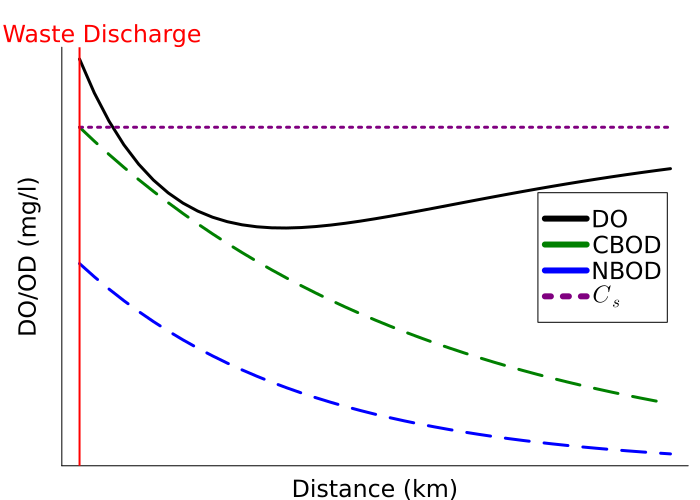

In [29]:
#| label: fig-do-single
#| fig-cap: "Sag curve for dissolved oxygen."
#| fig-width: 100%

p1 = plot(x, C, grid=false, color=:black, ylabel="DO/OD (mg/l)", xlabel="Distance (km)", label="DO", linewidth=3, left_margin=8mm, top_margin=10mm, guidefontsize=16, legendfontsize=16, tickfontsize=14, xticks=:false, yticks=:false, legend=:right)
plot!(x, B, color=:green, label="CBOD", linestyle=:dash, linewidth=3)
plot!(x, N, color=:blue, label="NBOD", linestyle=:dash, linewidth=3)
plot!(x, 10 * ones(length(x)), color=:purple, label=L"C_s", linestyle=:dot, linewidth=3)

annotate!(1.5, 12.75, text("Waste Discharge", pointsize=16, color=:red))
vline!([0], color=:red, linewidth=2, label=:false)
plot!(size=(700, 500))

In [44]:
C0 = 6.2
B0 = 9
N0 = 7

ka = 0.8
kc = 0.5
kn = 0.4
Cs = 7
U = 5

5

In [58]:
#| label: do-sim
#| echo: true
#| output: false

function dissolved_oxygen(x, Cs, C0, B0, N0, ka, kc, kn, U)
    α1 = exp(-ka * x / U)
    α2 = (kc / (ka - kc)) * (exp(-kc * x / U) - α1)
    α3 = (kn / (ka - kn)) * (exp(-kn * x / U) - α1)
    C = (Cs * (1 - α1)) + (C0 * α1) - (B0 * α2) - (N0 * α3)
    return C
end

x = 0:0.1:20
C = (y -> dissolved_oxygen(y, Cs, C0, B0, N0, ka, kc, kn, U)).(x)

201-element Vector{Float64}:
 6.2
 6.068528275075099
 5.940468200090665
 5.815753314510113
 5.694318328212234
 5.576099101819706
 5.461032627350308
 5.349057009185577
 5.240111445351806
 5.134136209108283
 ⋮
 4.276375358808163
 4.294672641060635
 4.312903987237417
 4.331068398294432
 4.349164909900672
 4.367192591711537
 4.385150546655366
 4.403037910232914
 4.4208538498295855

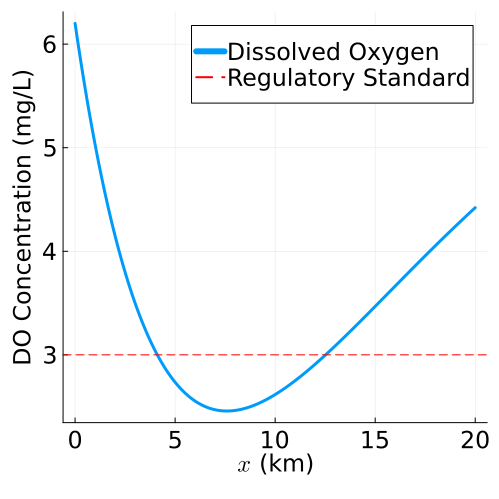

In [61]:
#| label: fig-do-sim
#| echo: true
#| fig-cap: "Single-Release Dissolved Oxygen Example"
#| output-location: column
#| code-fold: true

plot(x, C; linewidth=3, 
    label="Dissolved Oxygen", 
    tickfontsize=16, 
    guidefontsize=16, 
    legendfontsize=16)
xlabel!(L"$x$ (km)")
ylabel!("DO Concentration (mg/L)")
hline!([3], color=:red, 
    linestyle=:dash, 
    label="Regulatory Standard")
plot!(size=(500, 500))

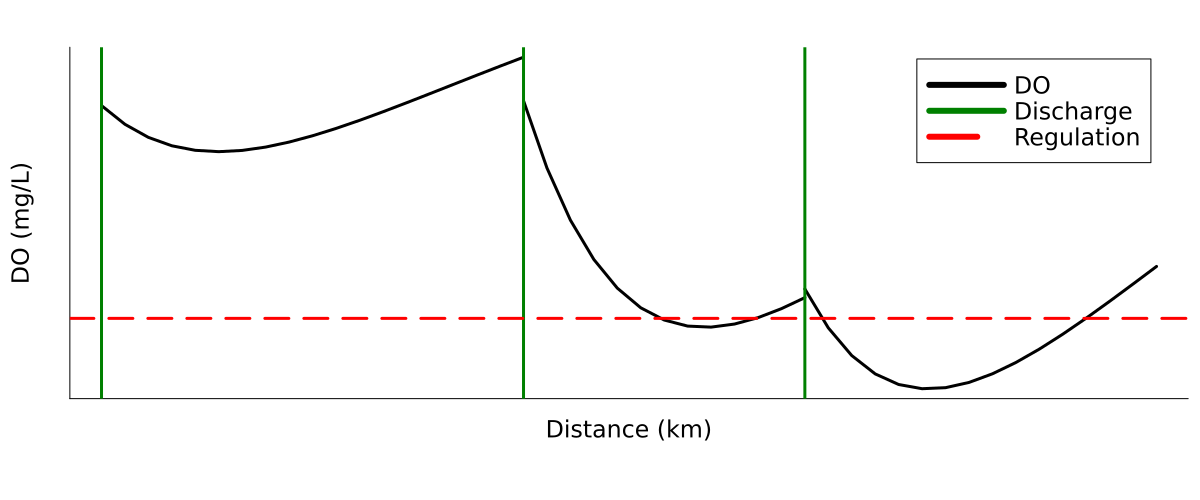

In [86]:
#| label: fig-do-multi
#| fig-cap: "Multi-Release Dissolved Oxygen Example"
#| fig-width: 100%

Q1 = 100000
Q2 = 20000
Q3 = 25000

x0 = 0
x1 = 18
x2 = 30
x3 = 45

C01 = 6
B01 = 5
N01 = 4.5

C1, B1, N1 = do_simulate(x0:x1, C01, B01, N01, ka, kc, kn, 9, 6)

C02 = (C1[length(C1)] * Q1 + 3 * Q2) / (Q1 + Q2)
B02 = (B1[length(B1)] * Q1 + 55 * Q2) / (Q1 + Q2)
N02 = (N1[length(N1)] * Q1 + 50 * Q2) / (Q1 + Q2)

C2, B2, N2 = do_simulate(x0:(x2-x1), C02, B02, N02, ka, kc, kn, 9, 6)

C03 = (C2[length(C2)] * (Q1 + Q2) + 4 * Q3) / (Q1 + Q2 + Q3)
B03 = (B2[length(B2)] * (Q1 + Q2) + 40 * Q3) / (Q1 + Q2 + Q3)
N03 = (N2[length(N2)] * (Q1 + Q2) + 30 * Q3) / (Q1 + Q2 + Q3)

C3, B3, N3 = do_simulate(x0:(x3-x2), C03, B03, N03, ka, kc, kn, 9, 6)

plot(x0:x1, C1, grid=false, color=:black, ylabel="DO (mg/L)", xlabel="Distance (km)", label="DO", xticks=:false, yticks=:false, linewidth=3, left_margin=12mm, top_margin=10mm, bottom_margin=20mm, guidefontsize=16, tickfontsize=16, legendfontsize=16)
plot!(x1:x2, C2, color=:black, label=false, linewidth=3)
plot!(x2:x3, C3, color=:black, label=false, linewidth=3)
plot!(size=(1200, 500))

vline!([x0, x1, x2], color=:green, linewidth=3, label="Discharge")
hline!([3], color=:red, linewidth=3, label="Regulation", linestyle=:dash)